In [51]:
#Importing required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn
import scipy
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"C:\Users\OM RAJ PANDEY\Desktop\jupyter\WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
#Checking total no. of rows and no. of columns
df.shape

(1470, 35)

# Data preprocessing and EDA
# Checking data types of all the columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Dividing the columns into 2 categories(continuous and categorical)

In [6]:
cat=[]
con=[]
for i in df.columns:
    if df[i].dtypes=="object":
        cat.append(i)
    else:
        con.append(i)

In [7]:
cat_df=df[['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']]

In [8]:
con_df=df[['Age','DailyRate','DistanceFromHome','Education','EnvironmentSatisfaction','HourlyRate','JobInvolvement',
          'JobLevel','JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike',
          'PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear',
          'WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]
#3 columns are removed as they have constant values and as of no use in the dataset further 'EmployeeCount','EmployeeNumber','StandardHours'

In [9]:
#Checking if there are null values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [10]:
#Summary of whole Dataset
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Hence from the summary it is seen that some of the columns are not normalised in curves as their mean!=median.Those are as follows

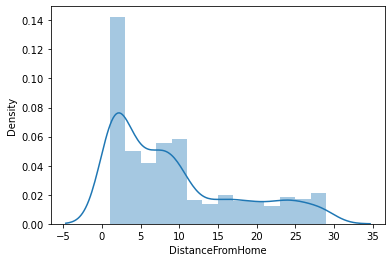

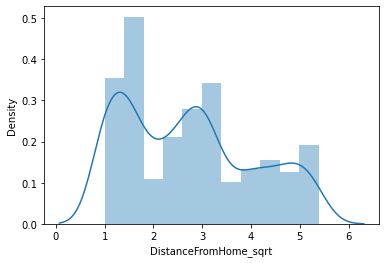

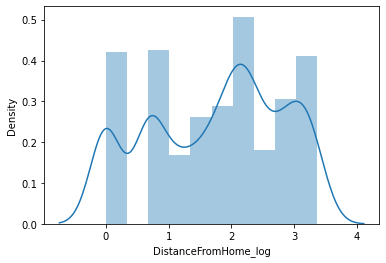

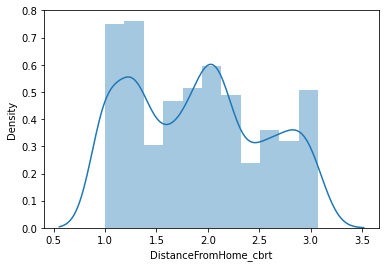

In [11]:
#Distance from Home
sb.distplot(df.DistanceFromHome)
plt.show()

df['DistanceFromHome_sqrt']=np.sqrt(df.DistanceFromHome)
sb.distplot(df.DistanceFromHome_sqrt)
plt.show()

df['DistanceFromHome_log']=np.log(df.DistanceFromHome)
sb.distplot(df.DistanceFromHome_log)
plt.show()

df['DistanceFromHome_cbrt']=np.cbrt(df.DistanceFromHome)
sb.distplot(df.DistanceFromHome_cbrt)
plt.show()

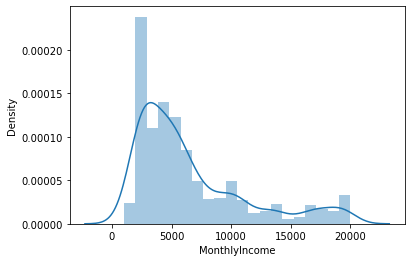

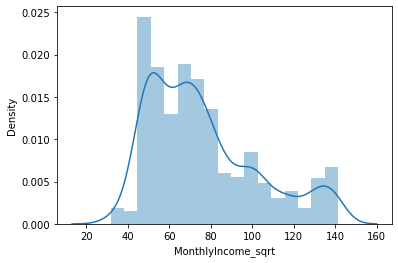

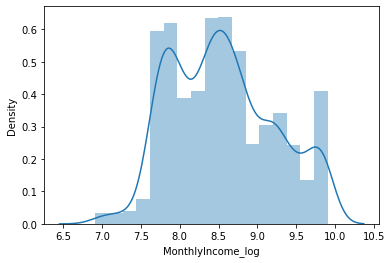

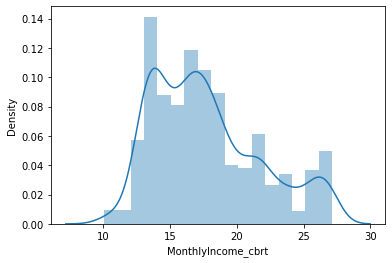

In [12]:
# 2.MonthlyIncome
sb.distplot(df.MonthlyIncome)
plt.show()
df['MonthlyIncome_sqrt']=np.sqrt(df.MonthlyIncome)
sb.distplot(df.MonthlyIncome_sqrt)
plt.show()

df['MonthlyIncome_log']=np.log(df.MonthlyIncome)
sb.distplot(df.MonthlyIncome_log)
plt.show()

df['MonthlyIncome_cbrt']=np.cbrt(df.MonthlyIncome)
sb.distplot(df.MonthlyIncome_cbrt)
plt.show()

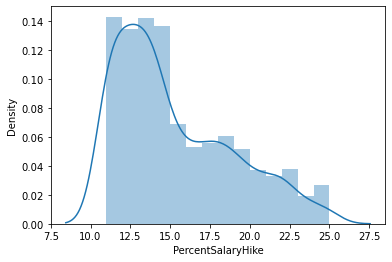

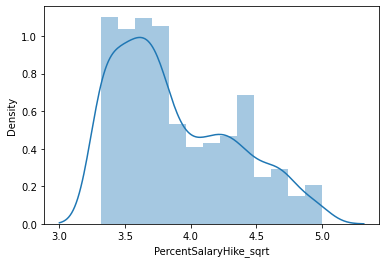

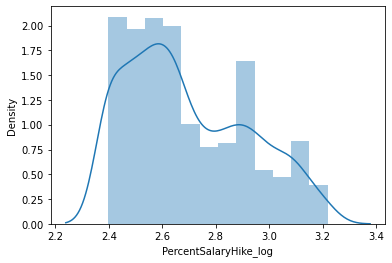

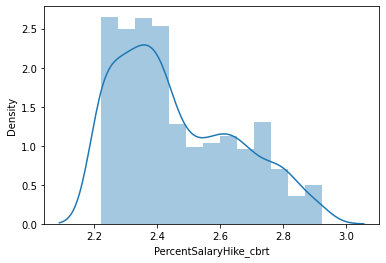

In [13]:
#3.PercentSalaryHike
sb.distplot(df.PercentSalaryHike)
plt.show()

df['PercentSalaryHike_sqrt']=np.sqrt(df.PercentSalaryHike)
sb.distplot(df.PercentSalaryHike_sqrt)
plt.show()

df['PercentSalaryHike_log']=np.log(df.PercentSalaryHike)
sb.distplot(df.PercentSalaryHike_log)
plt.show()

df['PercentSalaryHike_cbrt']=np.cbrt(df.PercentSalaryHike)
sb.distplot(df.PercentSalaryHike_cbrt)
plt.show()

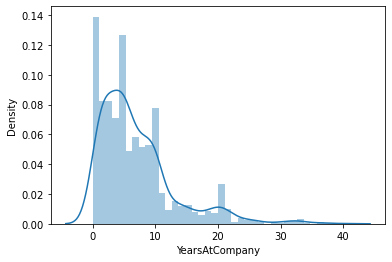

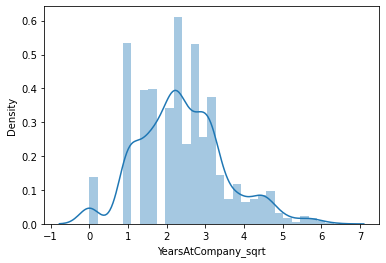

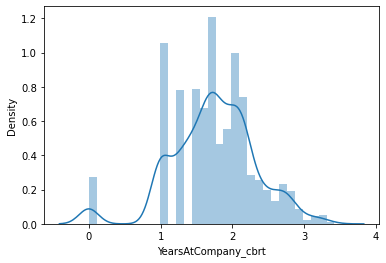

In [14]:
#4.YearsAtCompany
sb.distplot(df.YearsAtCompany)
plt.show()
df['YearsAtCompany_sqrt']=np.sqrt(df.YearsAtCompany)
sb.distplot(df.YearsAtCompany_sqrt)
plt.show()

df['YearsAtCompany_cbrt']=np.cbrt(df.YearsAtCompany)
sb.distplot(df.YearsAtCompany_cbrt)
plt.show()

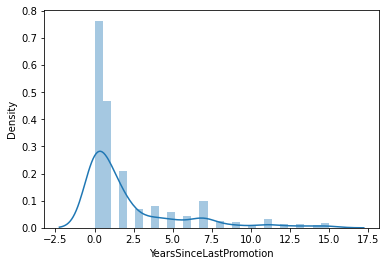

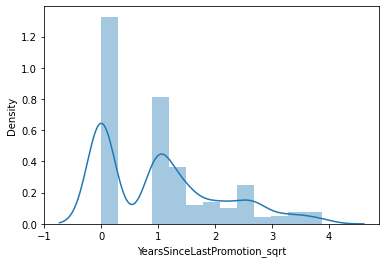

In [15]:
#5.YearsSinceLastPromotion
sb.distplot(df.YearsSinceLastPromotion)
plt.show()
df['YearsSinceLastPromotion_sqrt']=np.sqrt(df.YearsSinceLastPromotion)
sb.distplot(df.YearsSinceLastPromotion_sqrt)
plt.show()

# Checking correlation through Heatmap

<AxesSubplot:>

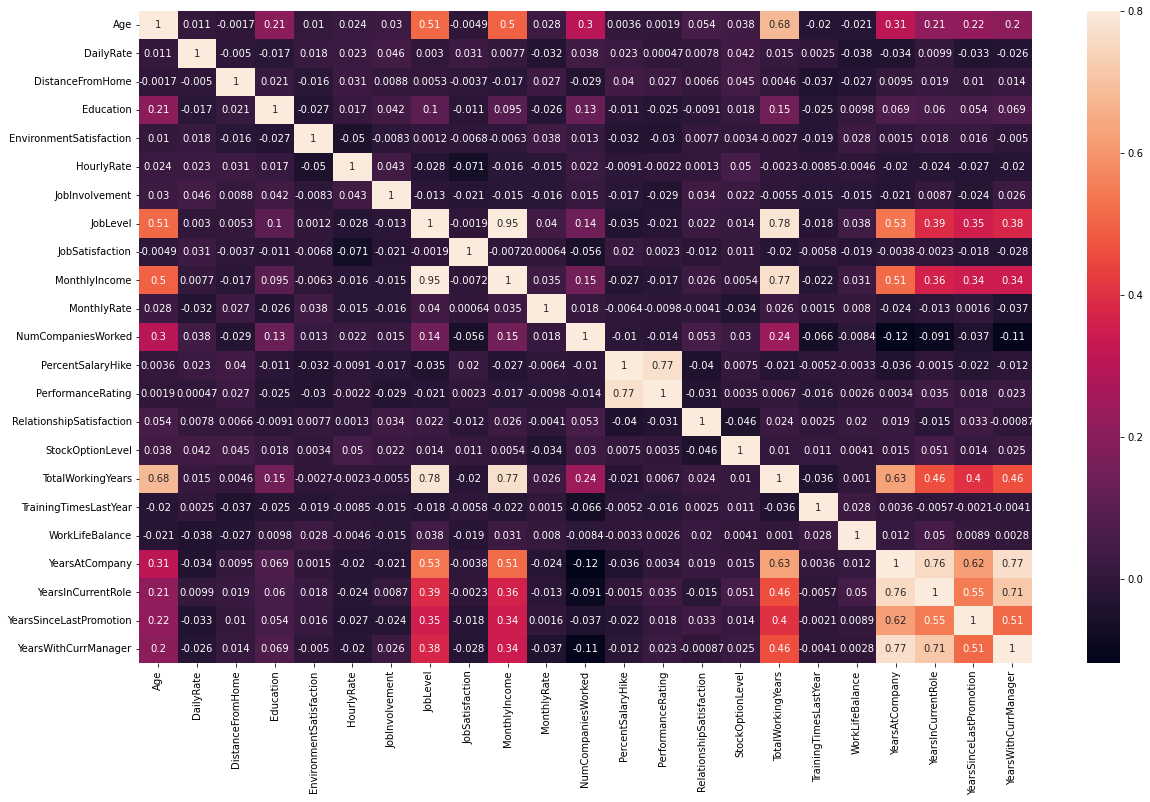

In [16]:
corr_heatmap=con_df.corr()
f,ax=plt.subplots(figsize=(20,12))
sb.heatmap(corr_heatmap,vmax=0.8,annot=True)

No such information is gained through heatmaps as it has too many columns and it is difficult to retrieve any conclusion.So other graphs has been plot to take out insight.

In [17]:
#show how much % of employees left the organization is as follows:
df.Attrition.value_counts(normalize=True)


No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

16% of the employees left the company.84% didnot leave the company(class Imbalanced Problem)

<AxesSubplot:>

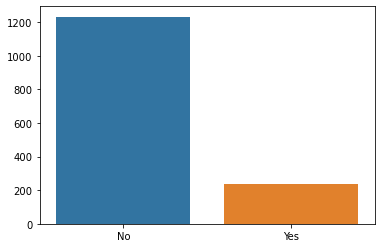

In [18]:
Attrition=df.Attrition.value_counts()
sb.barplot(x=Attrition.index,y=Attrition.values)

<AxesSubplot:ylabel='Attrition'>

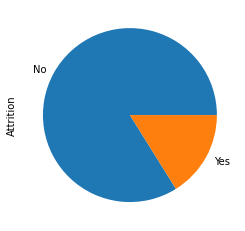

In [19]:
df['Attrition'].value_counts().plot(kind="pie")

This clearly shows that no. of "No" records is 84% and no. of "yes" records is 16%.This means data is imbalanced.This is class imbalanced problem.

In [20]:
df.OverTime.value_counts(normalize=True)

No     0.717007
Yes    0.282993
Name: OverTime, dtype: float64

<AxesSubplot:>

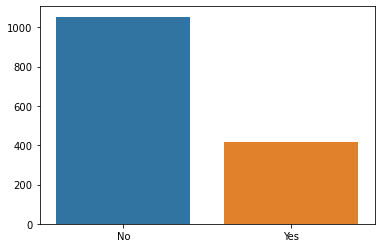

In [21]:
OverTime=df.OverTime.value_counts()
sb.barplot(x=OverTime.index,y=OverTime.values)

<AxesSubplot:ylabel='OverTime'>

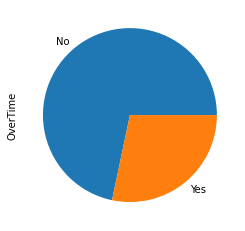

In [22]:
df['OverTime'].value_counts().plot(kind="pie")

# KDE plot(KERNAL DENSITY PLOT)

In [23]:
def kdeplot(var):
    fig=plt.figure(figsize=(15,4))
    ax=sb.kdeplot(df.loc[(df['Attrition']=='No'),var],color='b',shade=True, label='no Attrition')
    ax=sb.kdeplot(df.loc[(df['Attrition']=='yes'),var],color='r',shade=True,label='Attrition')
    plt.title('Employee Attrition with respect to {}'.format(var))

In [24]:
con_df=df.select_dtypes(include=np.number)
numeric_cols_kdeplot=list(con_df.columns)
remove_columns=['Age','DistanceFromHome','Education','EmployeeCount','EmployeeNumber','EnvironmentSatisfaction','HourlyRate',
               'JobInvolvement','JobSatisfaction','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','PerformanceRating',
               'RelationshipSatisfaction','StandardHours','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear',
               'WorkLifeBalance','YearsSinceLastPramotion']




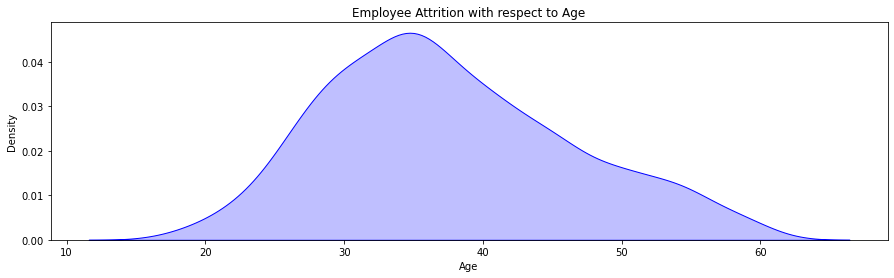

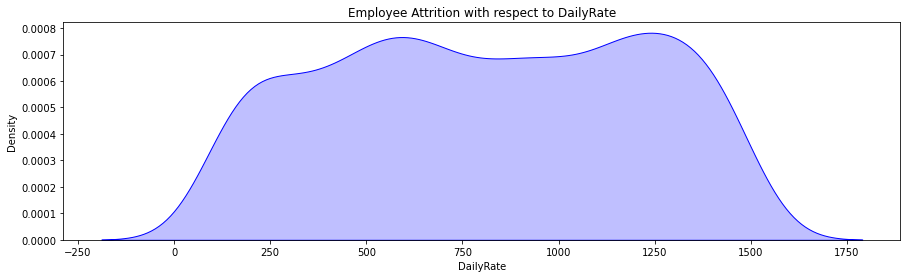

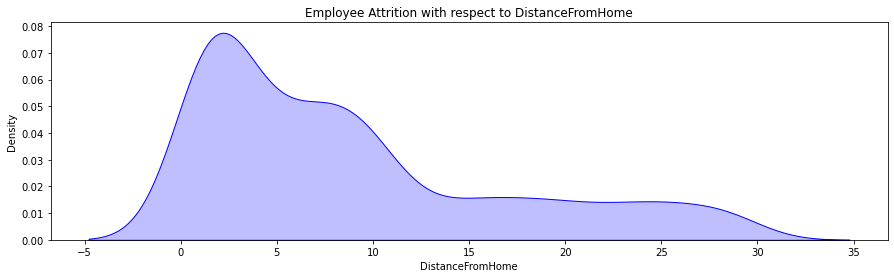

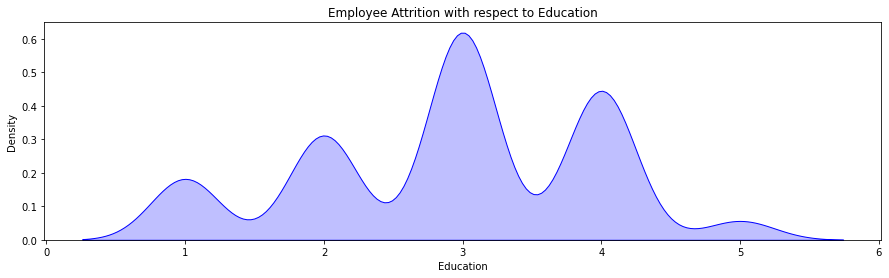

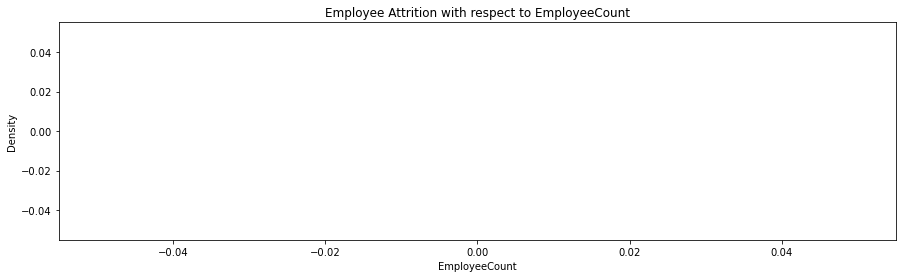

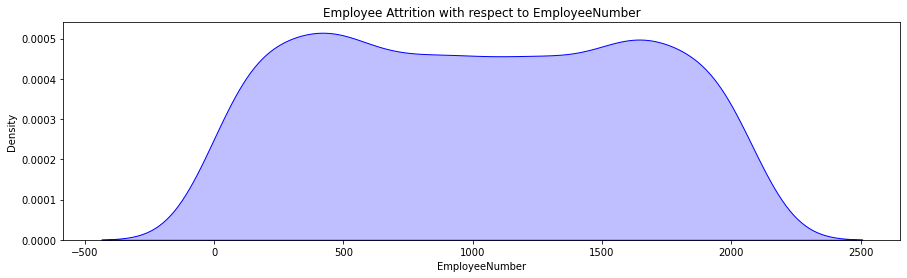

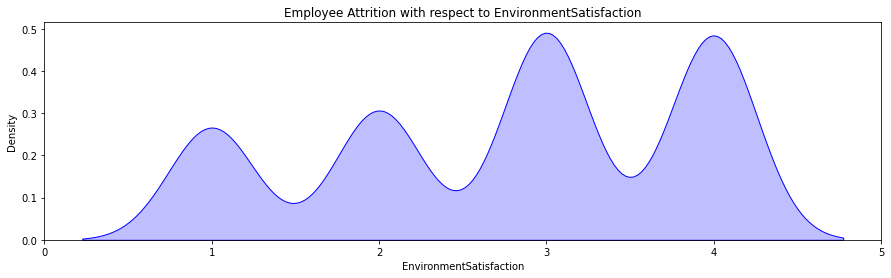

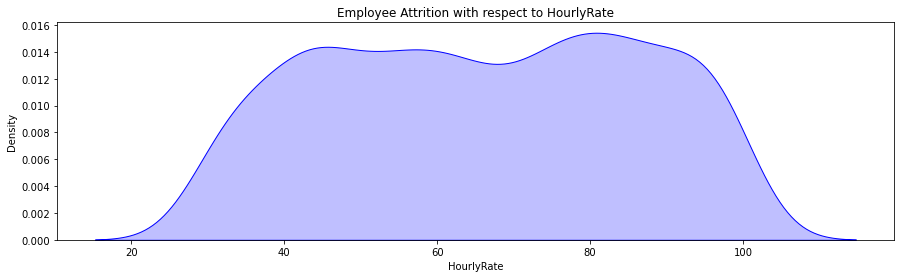

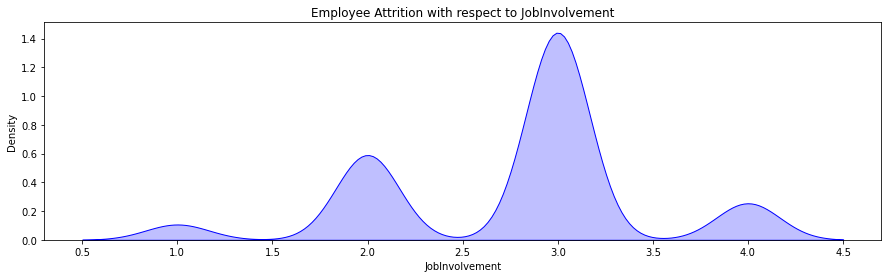

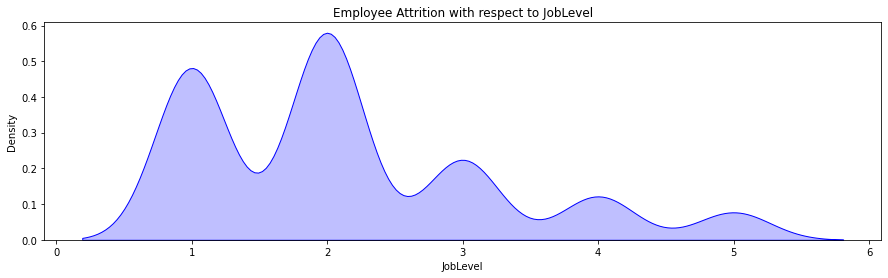

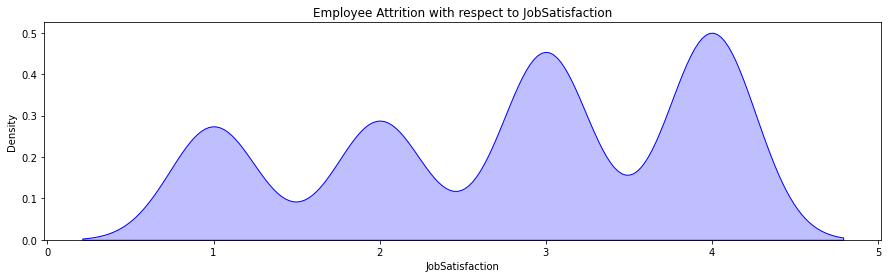

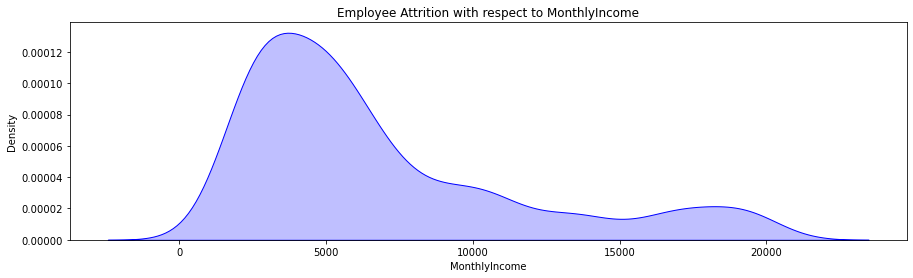

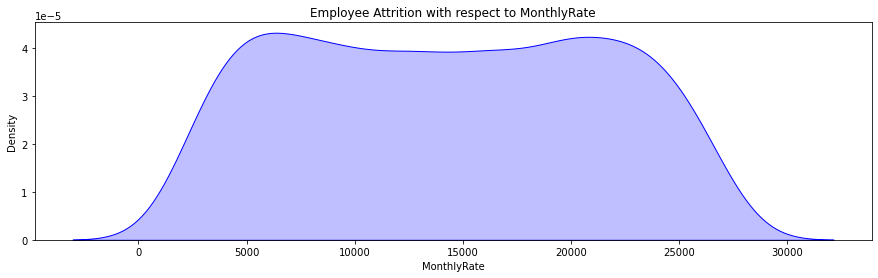

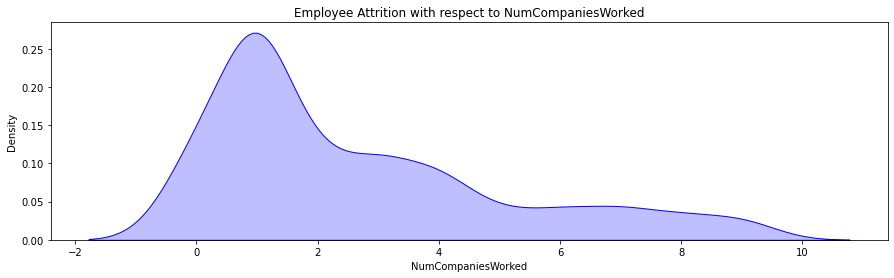

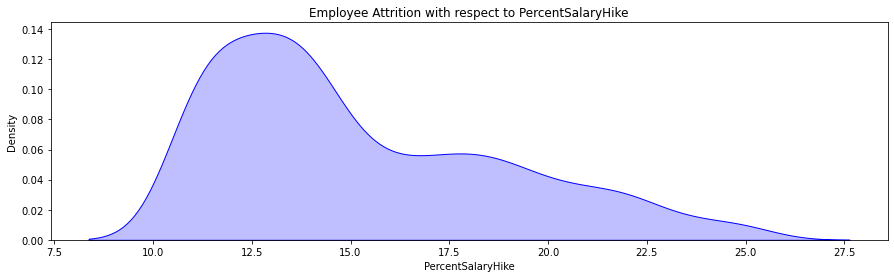

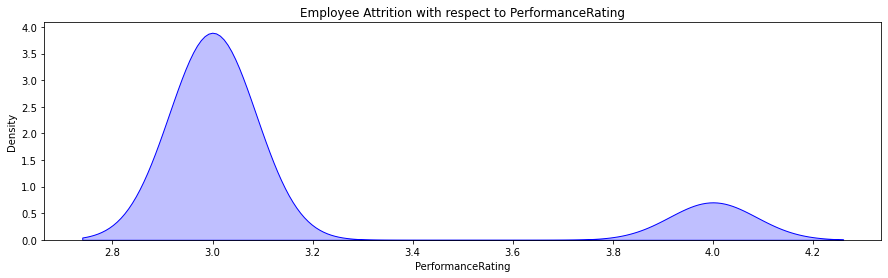

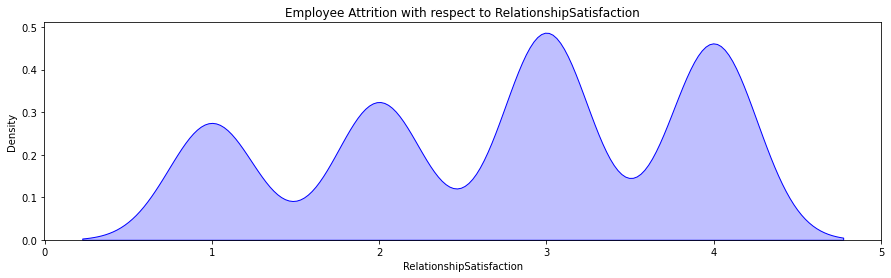

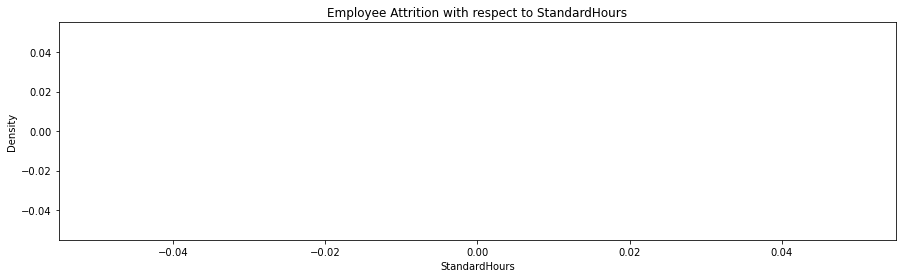

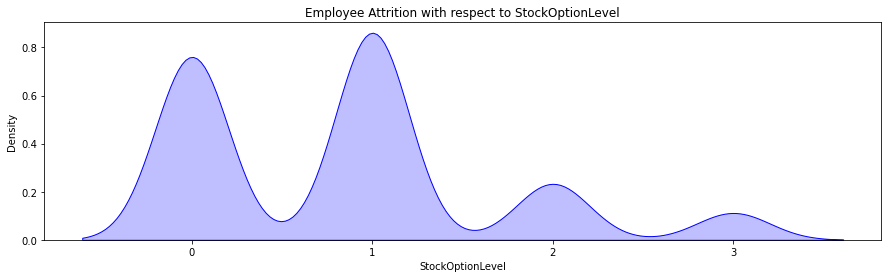

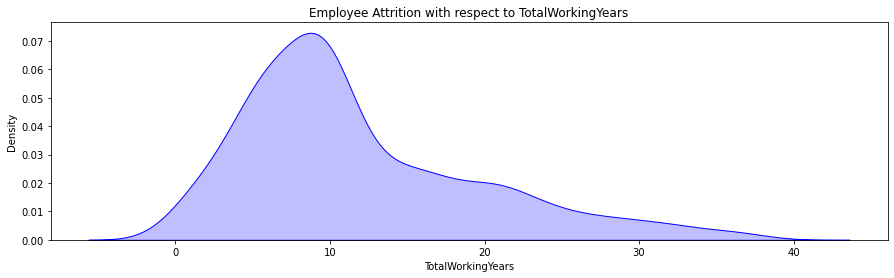

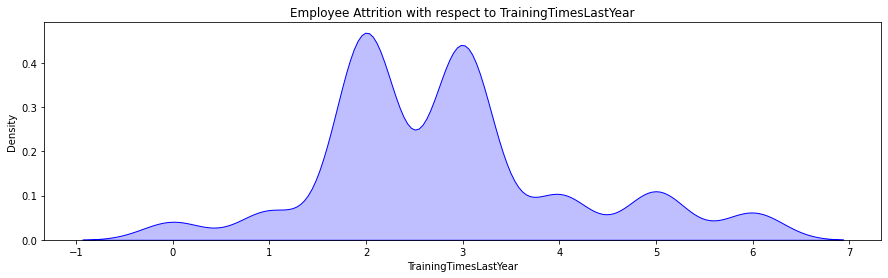

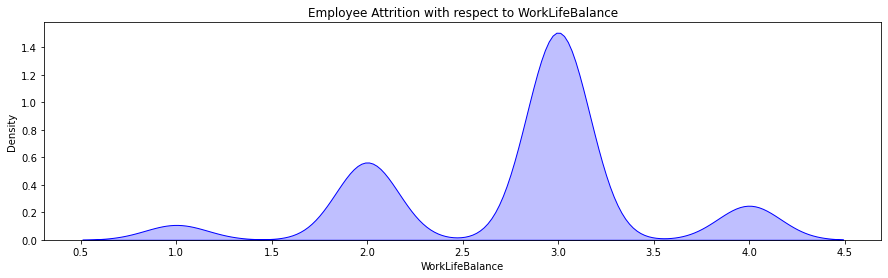

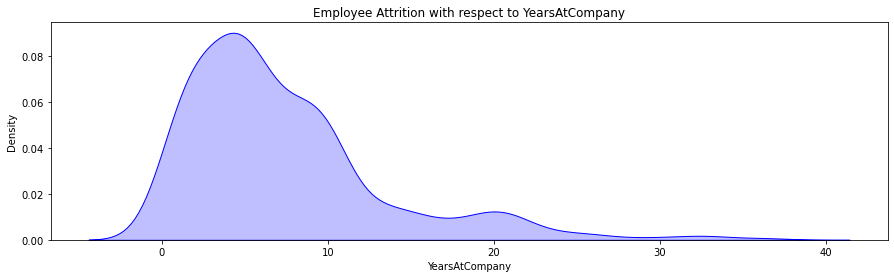

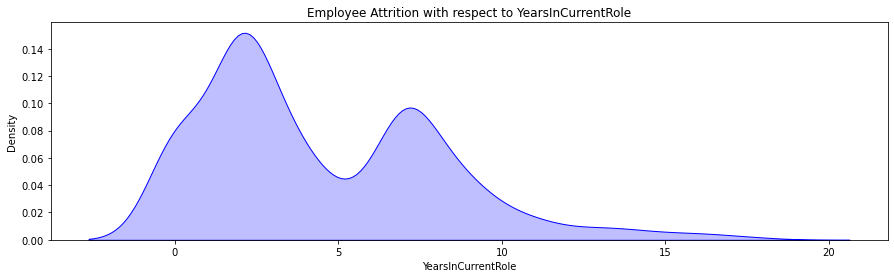

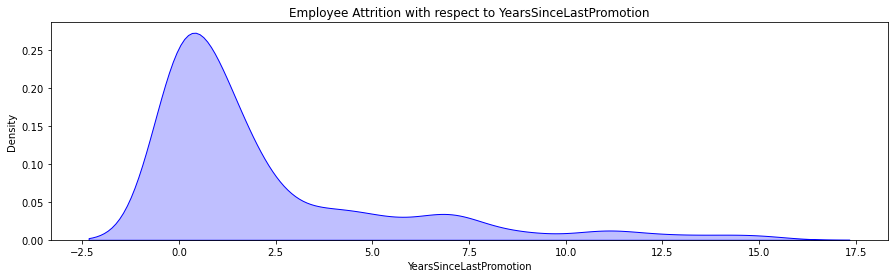

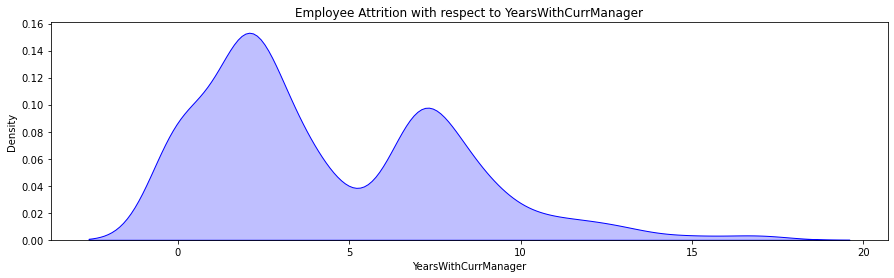

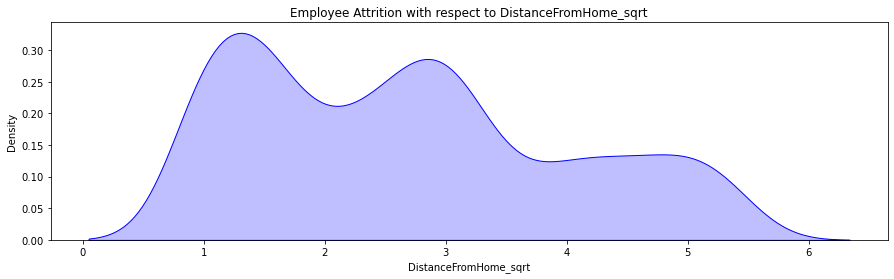

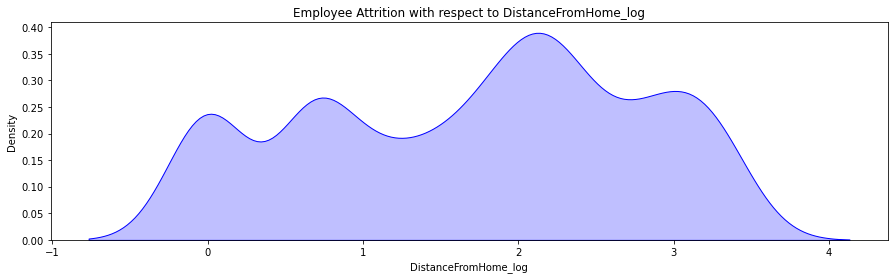

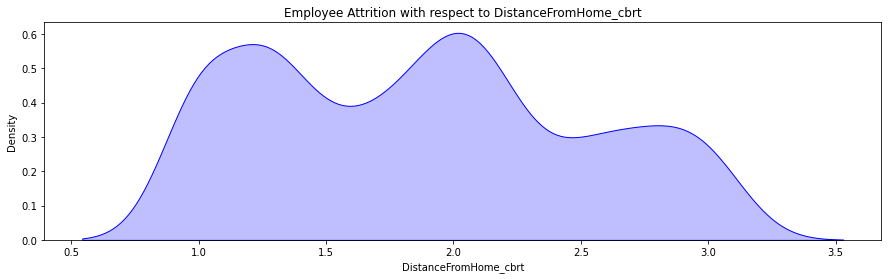

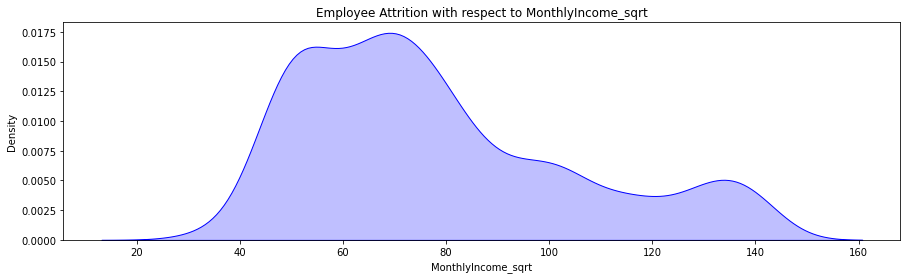

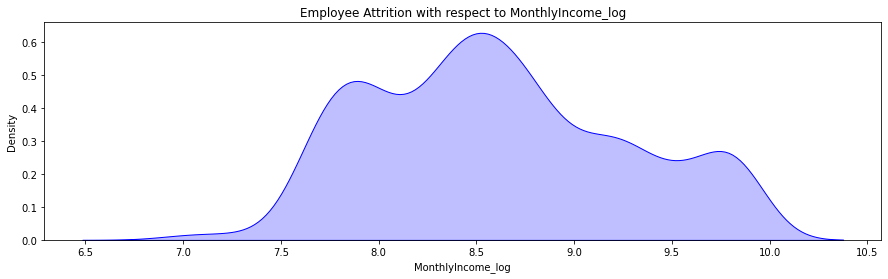

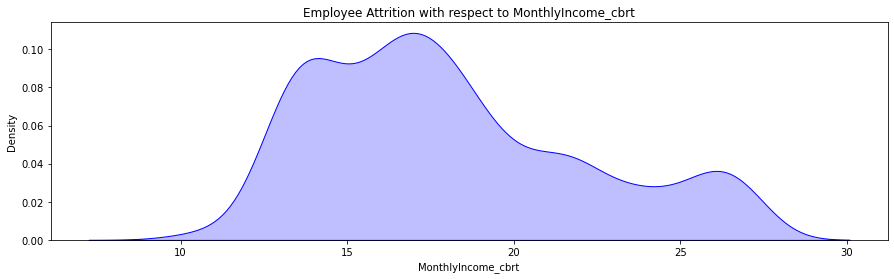

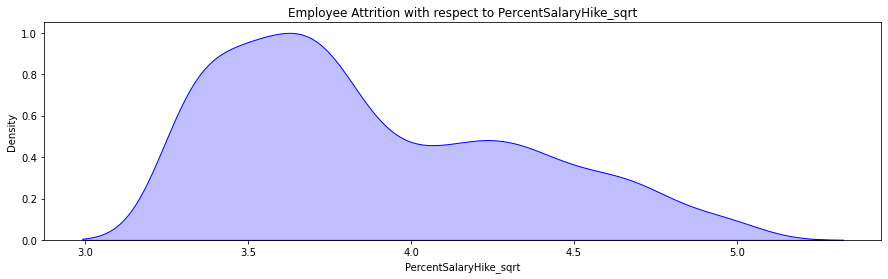

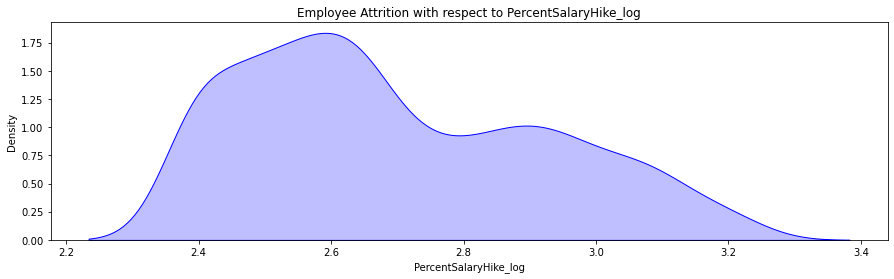

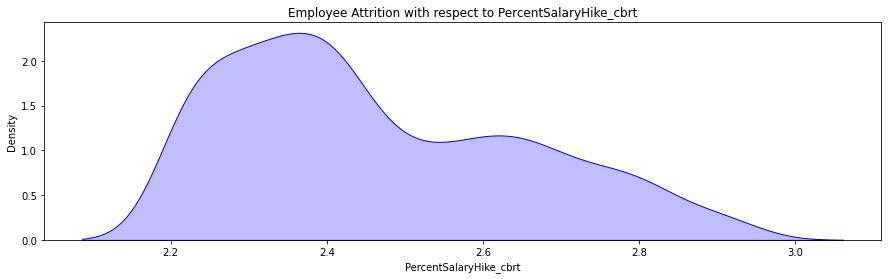

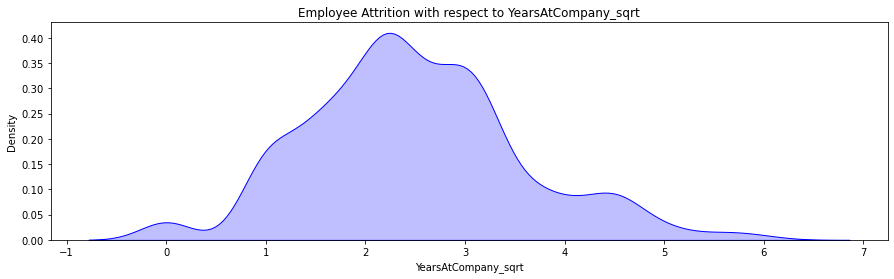

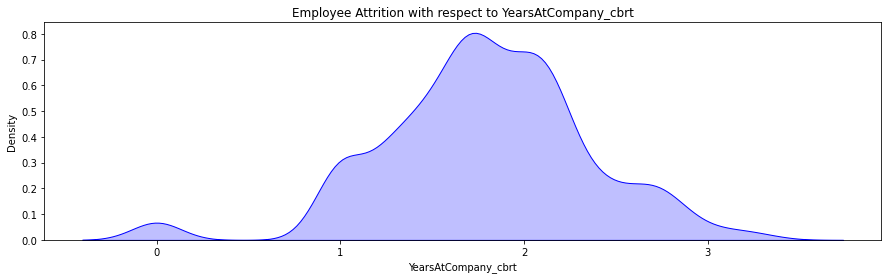

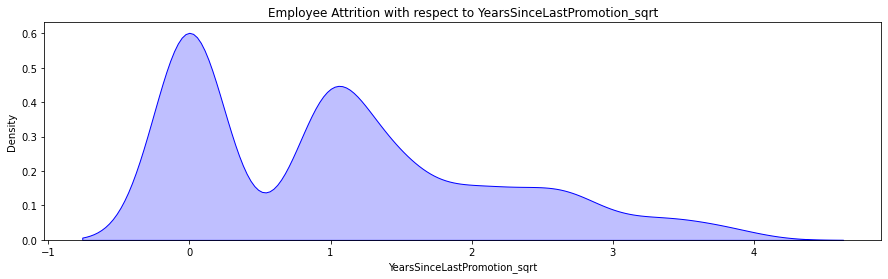

In [25]:
for n in numeric_cols_kdeplot:
    kdeplot(n)

# 1.Attrition is high at job level 1
# 2.Employees whose Monthly Income below 5000,have high Attrition.
# 3.Employees who worked in a company for 0 to 1 years(new hires/freshers),have high Attrition.
# 4. Employees who are in current role for about 0 to 4 hours have high rate of Attrition

# BAR PLOTS

In [26]:
BarPlot_columns=['Age','DistanceFromHome','EducationField','JobInvolvement','JobLevel','OverTime','JobRole','TotalWorkingYears',
                'TrainingTimesLastYear','WorkLifeBalance','YearsInCurrentRole']

In [27]:
#Methods for perform Barplots
def Bar_plots(var):
    col=pd.crosstab(df[var],df.Attrition)
    col.div(col.sum(1).astype(float),axis=0).plot(kind="bar",stacked=False,figsize=(8,4))
    plt.xticks(rotation=90)

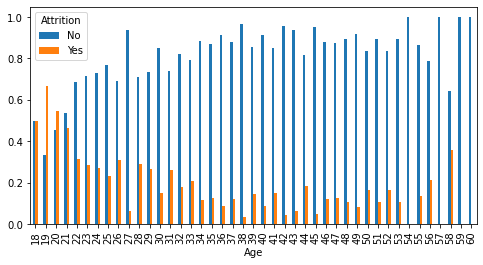

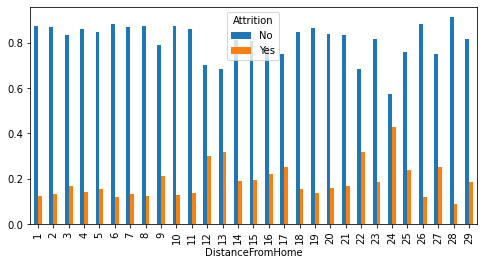

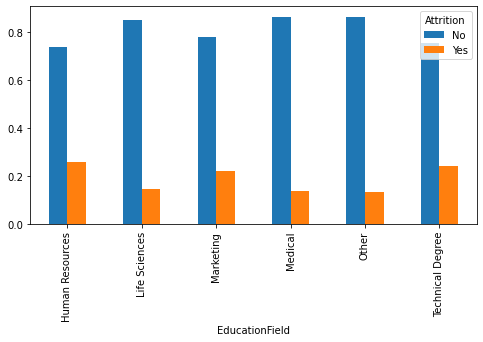

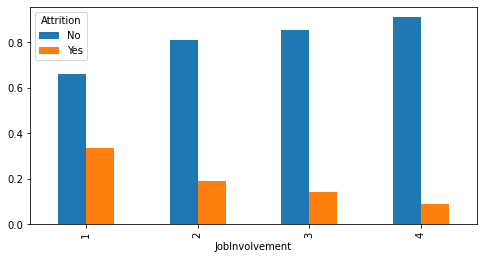

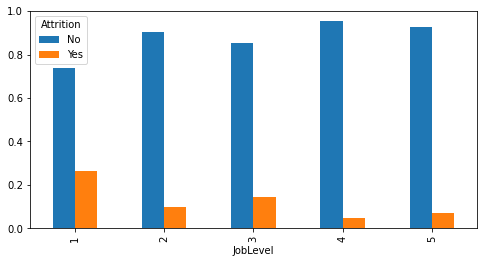

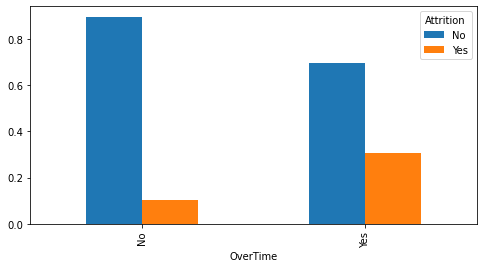

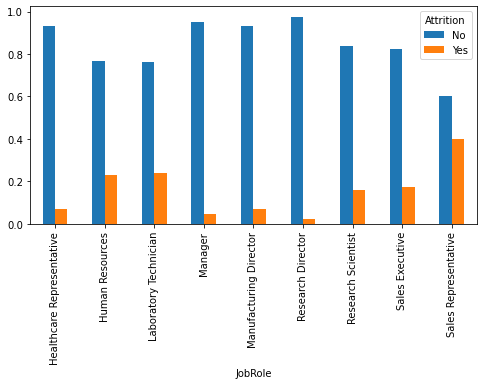

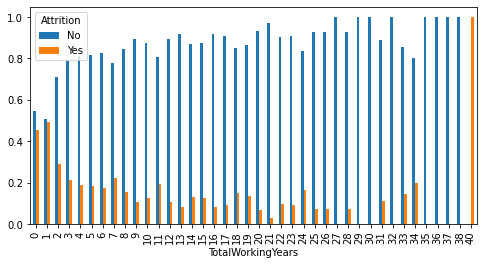

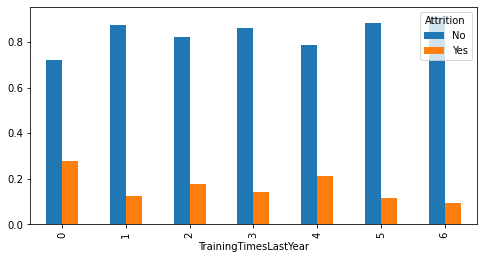

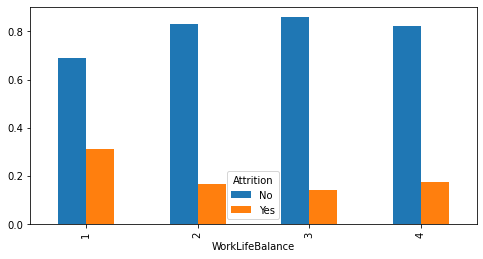

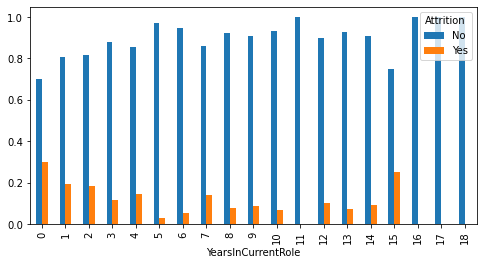

In [28]:
for col in BarPlot_columns:
    Bar_plots(col)

1.Attrition is very high with employees having age in between 18 to 22. This might be due to students who are doing internship or small contract jobs or on bench.
2.Attrition is more when the distance of office is more from home.
3.Attrition is high with employee's education in the field of Humen Resources,Marketing and Technical Degree to other fields
4.Attrition is high with employee's whose job role is in the field of HumenResources,SalesRepresentative,SalesExecutive,LaboratoryTechnician.
Employees who work overtime have high attrition than employees who did not do overtime.
Employees who are working less than 2 years have more attrition.

# Outlier Detection and Treatment

In [29]:
import numpy as np
from scipy import stats

In [30]:
z=np.abs(stats.zscore(df[['Age','DailyRate','DistanceFromHome','Education','EnvironmentSatisfaction','HourlyRate',
                         'JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome','MonthlyRate',
                          'NumCompaniesWorked','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction',
                         'StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance',
                         'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]))
print(z)
#Looking the code and the output above, it is difficult to say which data point is an outlier
#Let's try and define a threshold to identify an outlier
threshold=3
print(np.where(z>3))

           Age  DailyRate  DistanceFromHome  Education  \
0     0.446350   0.742527          1.010909   0.891688   
1     1.322365   1.297775          0.147150   1.868426   
2     0.008343   1.414363          0.887515   0.891688   
3     0.429664   1.461466          0.764121   1.061787   
4     1.086676   0.524295          0.887515   1.868426   
...        ...        ...               ...        ...   
1465  0.101159   0.202082          1.703764   0.891688   
1466  0.227347   0.469754          0.393938   1.868426   
1467  1.086676   1.605183          0.640727   0.085049   
1468  1.322365   0.546677          0.887515   0.085049   
1469  0.320163   0.432568          0.147150   0.085049   

      EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
0                    0.660531    1.383138        0.379672  0.057788   
1                    0.254625    0.240677        1.026167  0.057788   
2                    1.169781    1.284725        1.026167  0.961486   
3                  

# Removal of Outliers

In [31]:
df_out=df[(z<3).all(axis=1)]

In [32]:
df_out1=df_out.drop(["DistanceFromHome_sqrt","DistanceFromHome_log","DistanceFromHome_cbrt","MonthlyIncome_sqrt",
                    "MonthlyIncome_log","MonthlyIncome_cbrt","PercentSalaryHike_sqrt","PercentSalaryHike_log",
                    "YearsAtCompany_sqrt","YearsSinceLastPromotion_sqrt",
                    "YearsAtCompany_cbrt",],axis=1)

In [33]:
df_out1.shape

(1387, 36)

# Dividing final dataset into categorical and continuous variables

In [34]:
numerical_df=df_out1.select_dtypes(include=np.number)
categorical_df=df_out1.select_dtypes(exclude=np.number)
numerical_cols=list(numerical_df.columns)
categorical_cols=list(categorical_df.columns)

# Converting categorical variables to binary

In [35]:
categorical_df_dummies=pd.get_dummies(df_out1[categorical_cols],drop_first=True)
final_df=pd.concat([categorical_df_dummies,numerical_df],axis=1)
final_df.head()

,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PercentSalaryHike_cbrt
0,1,0,1,0,1,1,0,0,0,0,...,80,0,8,0,1,6,4,0,5,2.223980
1,0,1,0,1,0,1,0,0,0,0,...,80,1,10,3,3,10,7,1,7,2.843867
2,1,0,1,1,0,0,0,0,1,0,...,80,0,7,3,3,0,0,0,0,2.466212
3,0,1,0,1,0,1,0,0,0,0,...,80,0,8,3,3,8,7,3,0,2.223980
4,0,0,1,1,0,0,0,1,0,0,...,80,1,6,3,3,2,2,2,2,2.289428


In [36]:
final_df.shape

(1387, 49)

In [37]:
final_df.drop(["StandardHours","EmployeeNumber","EmployeeCount"],axis=1,inplace=True)
#removed those columns as those are of no use and two of them have constant values

In [38]:
final_df

,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PercentSalaryHike_cbrt
0,1,0,1,0,1,1,0,0,0,0,...,1,0,8,0,1,6,4,0,5,2.223980
1,0,1,0,1,0,1,0,0,0,0,...,4,1,10,3,3,10,7,1,7,2.843867
2,1,0,1,1,0,0,0,0,1,0,...,2,0,7,3,3,0,0,0,0,2.466212
3,0,1,0,1,0,1,0,0,0,0,...,3,0,8,3,3,8,7,3,0,2.223980
4,0,0,1,1,0,0,0,1,0,0,...,4,1,6,3,3,2,2,2,2,2.289428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,0,1,0,0,0,1,0,0,...,3,1,17,3,3,5,2,0,3,2.571282
1466,0,0,1,1,0,0,0,1,0,0,...,1,1,9,5,3,7,7,1,7,2.466212
1467,0,0,1,1,0,1,0,0,0,0,...,2,1,6,0,3,6,2,0,3,2.714418
1468,0,1,0,0,1,0,0,1,0,0,...,4,0,17,3,2,9,6,0,8,2.410142


# Creating model:

In [39]:
x=final_df.drop(['Attrition_Yes'],axis=1)
y=final_df[['Attrition_Yes']]

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3,random_state=30)

In [41]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
model_rfc=rfc.fit(x_train,y_train)
pred_rfc=model_rfc.predict(x_test)


In [42]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_test['Attrition_Yes'],pred_rfc))
print(accuracy_score(y_test['Attrition_Yes'],pred_rfc))

[[360   3]
 [ 45   9]]
0.8848920863309353


In [43]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model_lr=lr.fit(x_train,y_train)
pred_lr=model_lr.predict(x_test)

In [44]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_test['Attrition_Yes'],pred_lr))
print(accuracy_score(y_test['Attrition_Yes'],pred_lr))

[[363   0]
 [ 54   0]]
0.8705035971223022


In [45]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
model_dt=dt.fit(x_train,y_train)
pred_dt=model_dt.predict(x_test)

In [46]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_test['Attrition_Yes'],pred_dt))
print(accuracy_score(y_test['Attrition_Yes'],pred_dt))

[[311  52]
 [ 27  27]]
0.8105515587529976


In [47]:
from sklearn.ensemble import AdaBoostClassifier
ab=AdaBoostClassifier()
model_ab=ab.fit(x_train,y_train)
pred_ab=model_ab.predict(x_test)

In [48]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_test['Attrition_Yes'],pred_ab))
print(accuracy_score(y_test['Attrition_Yes'],pred_ab))

[[348  15]
 [ 33  21]]
0.8848920863309353


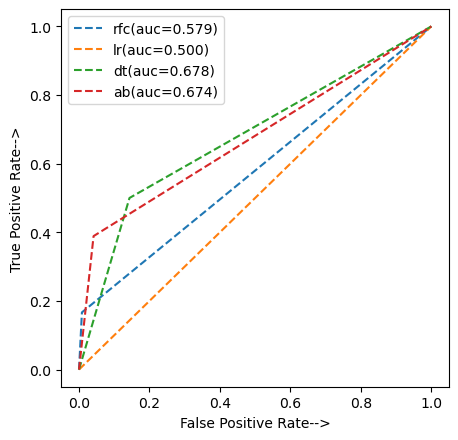

In [49]:
#Plot ROC and compare Auc
from sklearn.metrics import roc_curve,auc
rfc_fpr,rfc_tpr, threshold=roc_curve(y_test,pred_rfc)
auc_rfc=auc(rfc_fpr,rfc_tpr)
lr_fpr,lr_tpr, threshold=roc_curve(y_test,pred_lr)
auc_lr=auc(lr_fpr,lr_tpr)
dt_fpr,dt_tpr, threshold=roc_curve(y_test,pred_dt)
auc_dt=auc(dt_fpr,dt_tpr)
ab_fpr,ab_tpr, threshold=roc_curve(y_test,pred_ab)
auc_ab=auc(ab_fpr,ab_tpr)
plt.figure(figsize=(5,5),dpi=100)
plt.plot(rfc_fpr,rfc_tpr,linestyle='dashed',label='rfc(auc=%0.3f)'%auc_rfc)
plt.plot(lr_fpr,lr_tpr,linestyle='dashed',label='lr(auc=%0.3f)'%auc_lr)
plt.plot(dt_fpr,dt_tpr,linestyle='dashed',label='dt(auc=%0.3f)'%auc_dt)
plt.plot(ab_fpr,ab_tpr,linestyle='dashed',label='ab(auc=%0.3f)'%auc_ab)
plt.xlabel('False Positive Rate-->')
plt.ylabel('True Positive Rate-->')
plt.legend()
plt.show()

A larger area means the better model.Here Decision Tree Classifier is our best model

In [53]:
#Hyperparameter tuning
param_dist={"criterion":["gini","entropy"],"max_depth":[1,2,3,4,5,6,7,None]}

In [54]:
grid=GridSearchCV(dt, param_grid=param_dist, cv=10, n_jobs=-1)

In [55]:
grid.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, None]})

In [56]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=3)

In [57]:
grid.best_score_

0.8278350515463917

In [58]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [59]:
#save the model using joblib
dt=DecisionTreeClassifier()
dt.fit(x,y)

DecisionTreeClassifier()

In [60]:
import joblib

In [61]:
joblib.dump(dt,'model_joblib_dt')

['model_joblib_dt']

In [62]:
model=joblib.load('model_joblib_dt')